#### Implementing FNN from Scratch for a Regression task on sklearn dataset.
        No of Hidden layers = 4
        No of Hidden Units = 20
        No of epochs = 1000
        Mini-batch size = 16
        Learning Algorithm = Gradient descent with backpropagation
        Loss function = sum of squares fxn (Output Activation = Linear)
        Loss function = cross-entropy (Output Actiavation = softmax)
        Using Sigmoid(logistic function) for activation in between layers

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Defining Basic functions

In [2]:
# there are other activation fxns tooo ReLu , tanh and so on we prefer sigmoid because output is real and is between 0 and 1 so can intrepet as probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
# if we are using softmax function to activate the outermost layer then we need to use cross entropy as the loss function else in the case of using linear then use MSE as the loss function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
# not needed for regression
def cross_entropy_loss(predictions, targets):
    return -np.sum(targets * np.log(predictions + 1e-9)) / targets.shape[0]

#### Nueral Network with 4 hidden layers
Algorithm Using : Gradient Descent with backward propagation

In [3]:
class FeedforwardNN:
    def __init__(self, input_size, hidden_size, output_size): #assumming all hidden layers are having same no of nuerons
    # step 1 : initializing wts and biases
        self.weights_0 = np.random.randn(input_size, hidden_size) # weights from input layer to first hidden layer
        self.weights_1 = np.random.randn(hidden_size, hidden_size) # weights from first hidden layer to second hidden layer
        self.weights_2 = np.random.randn(hidden_size, hidden_size) # and so on 
        self.weights_3 = np.random.randn(hidden_size, hidden_size)
        self.weights_4 = np.random.randn(hidden_size, output_size)

        self.bias_0 = np.zeros((1, hidden_size))
        self.bias_1 = np.zeros((1, hidden_size))
        self.bias_2 = np.zeros((1, hidden_size))
        self.bias_3 = np.zeros((1, hidden_size))
        self.bias_4 = np.zeros((1, output_size))
    # step 2: forward prop -> computes activation for hidden and output layers
    def forward(self, X):
        self.z0 = sigmoid(np.dot(X, self.weights_0) + self.bias_0)
        self.z1 = sigmoid(np.dot(self.z0, self.weights_1) + self.bias_1)
        self.z2 = sigmoid(np.dot(self.z1, self.weights_2) + self.bias_2)
        self.z3 = sigmoid(np.dot(self.z2, self.weights_3) + self.bias_3)
        self.output = (np.dot(self.z3, self.weights_4) + self.bias_4) # linear activation function
        return self.output
    # step 3 : backward prop -> adjusting the weights based on the error between predicted and auctual outputs
    def backward(self, X, y, learning_rate):
        m = y.shape[0]

        # Output layer error
        output_error = self.output - y

        # Hidden layer 3 error
        hidden_3_error = np.dot(output_error, self.weights_4.T) * sigmoid_derivative(self.z3)

        # Hidden layer 2 error
        hidden_2_error = np.dot(hidden_3_error, self.weights_3.T) * sigmoid_derivative(self.z2)

        # Hidden layer 1 error
        hidden_1_error = np.dot(hidden_2_error, self.weights_2.T) * sigmoid_derivative(self.z1)

        # Hidden layer 0 error
        hidden_0_error = np.dot(hidden_1_error, self.weights_1.T) * sigmoid_derivative(self.z0)

        # Update weights and biases (why we are using - bcz of GD algorithm proof can be done by using cos(angle) is ---)
        self.weights_4 -= learning_rate * np.dot(self.z3.T, output_error) / m
        self.bias_4 -= learning_rate * np.sum(output_error, axis=0, keepdims=True) / m

        self.weights_3 -= learning_rate * np.dot(self.z2.T, hidden_3_error) / m
        self.bias_3 -= learning_rate * np.sum(hidden_3_error, axis=0, keepdims=True) / m

        self.weights_2 -= learning_rate * np.dot(self.z1.T, hidden_2_error) / m
        self.bias_2 -= learning_rate * np.sum(hidden_2_error, axis=0, keepdims=True) / m

        self.weights_1 -= learning_rate * np.dot(self.z0.T, hidden_1_error) / m
        self.bias_1 -= learning_rate * np.sum(hidden_1_error, axis=0, keepdims=True) / m

        self.weights_0 -= learning_rate * np.dot(X.T, hidden_0_error) / m
        self.bias_0 -= learning_rate * np.sum(hidden_0_error, axis=0, keepdims=True) / m

Load and Preprocess data

In [4]:
data = fetch_california_housing()
X, y = data.data, data.target.reshape(-1, 1)

**Normalize features

In [5]:
"""Note: Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1],
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling to the test set for meaningful results. You can use StandardScaler for standardization."""
scaler = StandardScaler()
X = scaler.fit_transform(X)

Computing

Epoch 0, Loss: 25.884283102755877
Epoch 100, Loss: 1.120466946174886
Epoch 200, Loss: 0.8834961127872215
Epoch 300, Loss: 0.7567730453670986
Epoch 400, Loss: 0.6980541289498603
Epoch 500, Loss: 0.6740269850435717
Epoch 600, Loss: 0.6643984093011879
Epoch 700, Loss: 0.6596597719429449
Epoch 800, Loss: 0.6561817675428392
Epoch 900, Loss: 0.6528381636318973


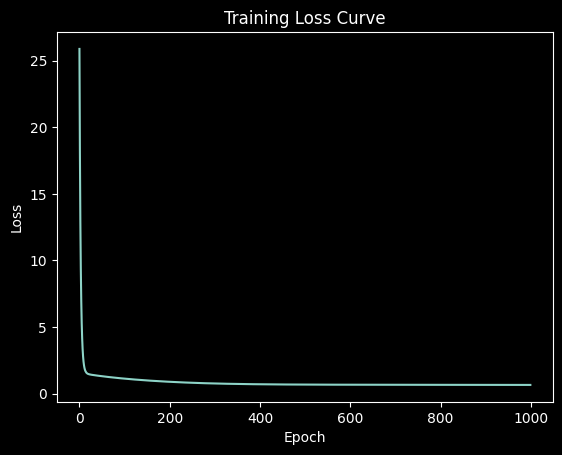

Test Loss: 0.6528359232339029


In [6]:
# # Convert target to categorical (binned regression)
# y_binned = pd.qcut(y, q=10, labels=False)  # Divide into 10 bins
# y_one_hot = np.eye(10)[y_binned]  # One-hot encoding

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Neural Network
nn = FeedforwardNN(input_size=X_train.shape[1], hidden_size=20, output_size=1) # setting the no of hidden layers to be equal to 20
num_epochs = 1000
learning_rate = 0.01 #Determines how quickly the model updates weights

losses = []
for epoch in range(num_epochs):
    predictions = nn.forward(X_train)
    loss = mean_squared_error(predictions, y_train)
    losses.append(loss)
    nn.backward(X_train, y_train, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")
# if using mini batch gradient descent 
# num_epochs = 1000
# learning_rate = 0.01
# batch_size = 32  # Mini-batch size

# losses = []
# for epoch in range(num_epochs):
#     # Shuffle the training data
#     permutation = np.random.permutation(X_train.shape[0])
#     X_train_shuffled = X_train[permutation]
#     y_train_shuffled = y_train[permutation]
    
#     for i in range(0, X_train.shape[0], batch_size):
#         X_batch = X_train_shuffled[i:i + batch_size]
#         y_batch = y_train_shuffled[i:i + batch_size]
        
#         predictions = nn.forward(X_batch)
#         loss = mean_squared_error(predictions, y_batch)
#         losses.append(loss)
#         nn.backward(X_batch, y_batch, learning_rate)

#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}, Loss: {loss}")
# Plot Loss Curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
# Reminder : 80 percent train data , 20 test 
# # Evaluate on Train Data 
# train_predictions = nn.forward(X_train)
# train_loss = mean_squared_error(train_predictions,y_train)
# print(f"Train loss: {train_loss}")
# Evaluate on Test Data
test_predictions = nn.forward(X_test)
test_loss = mean_squared_error(test_predictions, y_test)
print(f"Test Loss: {test_loss}")